In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [22]:
url = 'https://raw.githubusercontent.com/ovlathkar/Prediction-with-Binomial-Logistic-Regression/refs/heads/main/bank-full.csv'
data = pd.read_csv(url, sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
print("Performing EDA!!!")
print("Dataset Info:\n")
print(data.info())
print("Missing Values:\n",data.isnull().sum())
print("\nTarget Variable Distribution:\n", data['y'].value_counts(normalize=True))

Performing EDA!!!
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Missing Values:
 age          0
job          0
marital      0

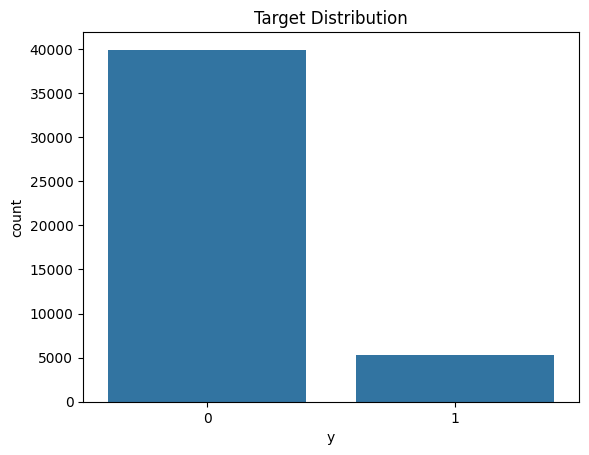

In [35]:
sns.countplot(x='y', data=data)
plt.title("Target Distribution")
plt.show()

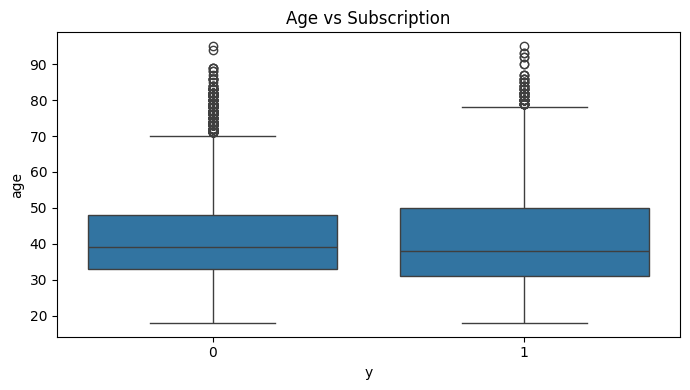

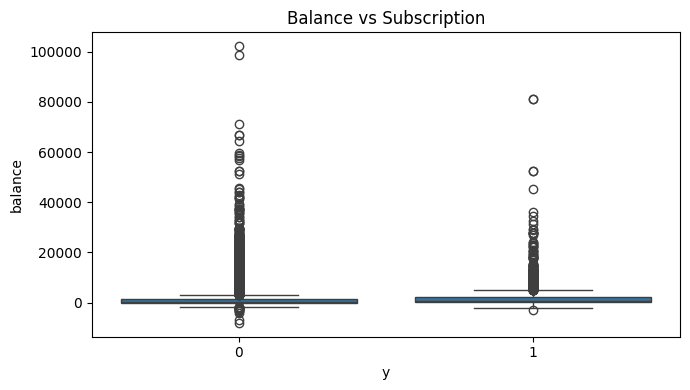

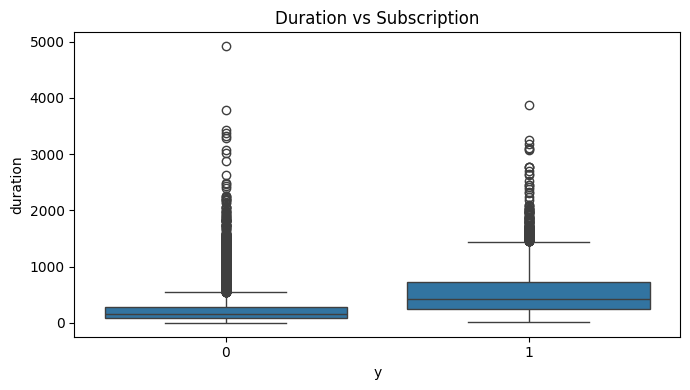

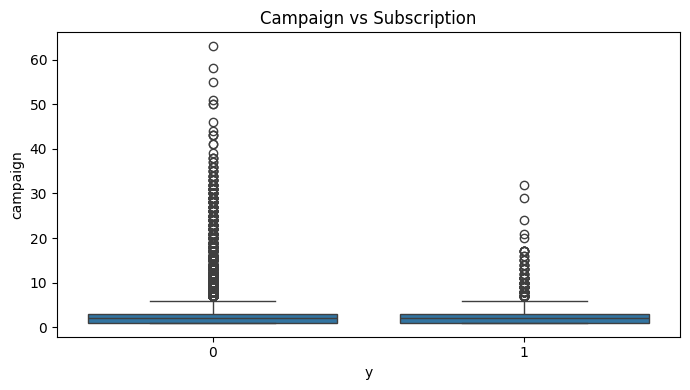

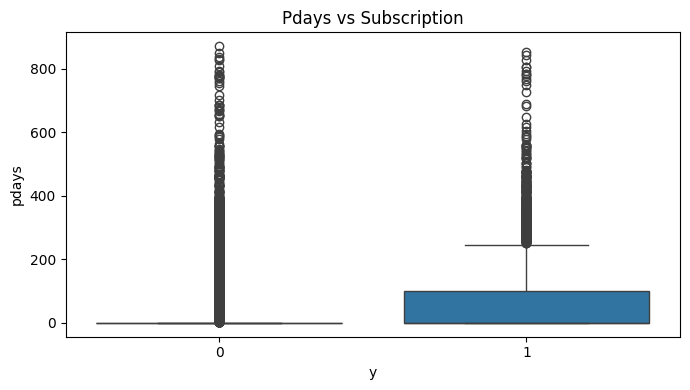

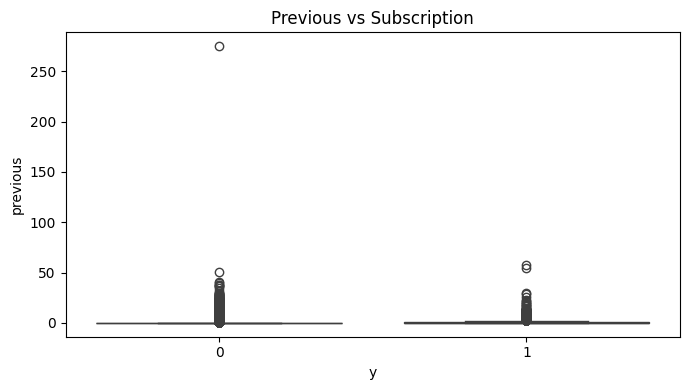

In [36]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f'{col.capitalize()} vs Subscription')
    plt.tight_layout()
    plt.show()

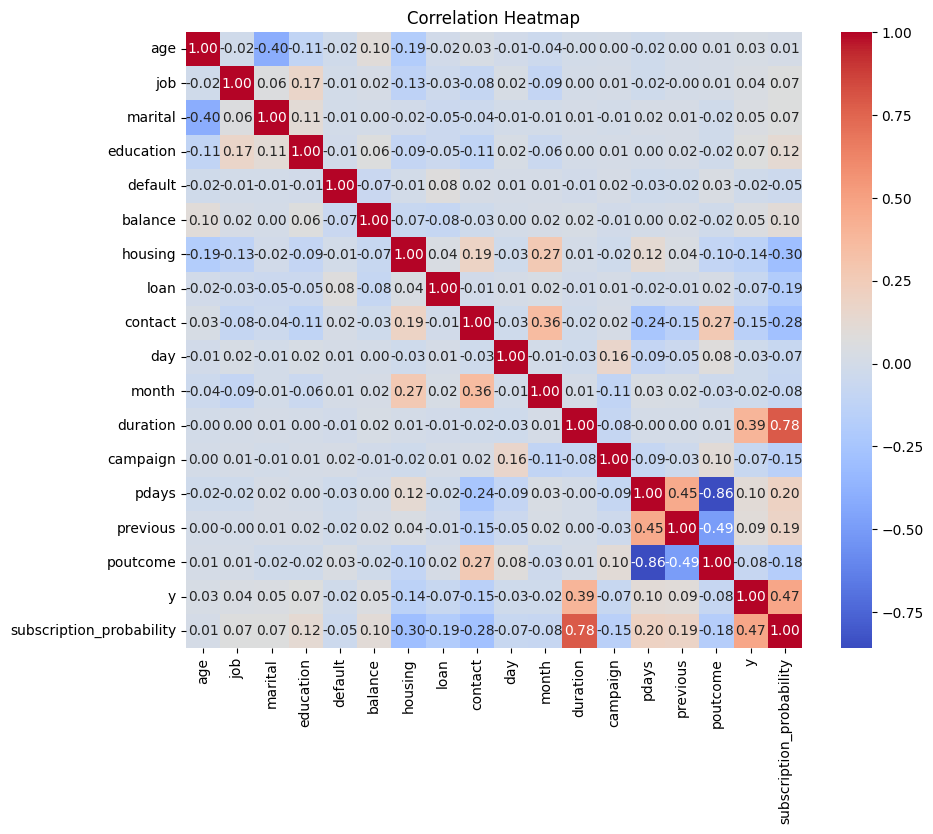

In [37]:
plt.figure(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [25]:
cat_cols = data.select_dtypes(include='object').columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [26]:
X = data.drop('y', axis=1)
y = data['y']
X


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)
print("Model Training Done!!!")

Model Training Done!!!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Predicted Values\n", y_pred)
print("Predicted Probabilities\n", y_prob)

Predicted Values
 [0 0 0 ... 0 0 0]
Predicted Probabilities
 [0.0085015  0.0161852  0.01338044 ... 0.10289247 0.13821335 0.01492627]


In [30]:
comparison_table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_prob
})
print("Table showing comparison between predicted values and actual values\n",comparison_table)

Table showing comparison between predicted values and actual values
        Actual  Predicted  Probability
1392        0          0     0.008502
7518        0          0     0.016185
12007       0          0     0.013380
5536        0          0     0.009748
29816       0          0     0.037443
...       ...        ...          ...
12636       0          0     0.135271
13364       0          0     0.026161
16102       0          0     0.102892
42097       0          0     0.138213
31033       0          0     0.014926

[9043 rows x 3 columns]


In [31]:
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 4))

Confusion Matrix:
 [[7822  163]
 [ 826  232]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.59      0.22      0.32      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

ROC AUC Score: 0.8674


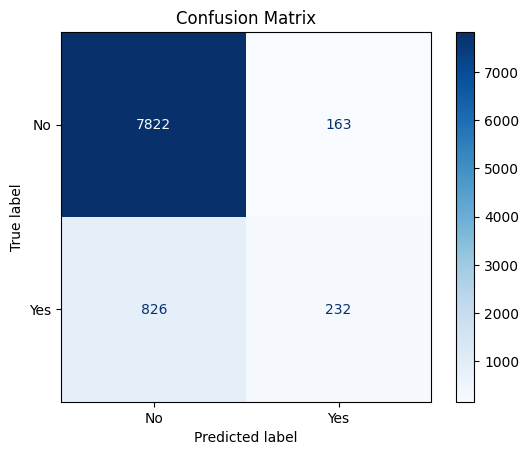

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cdf = ConfusionMatrixDisplay(cf, display_labels=['No', 'Yes'])
cdf.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

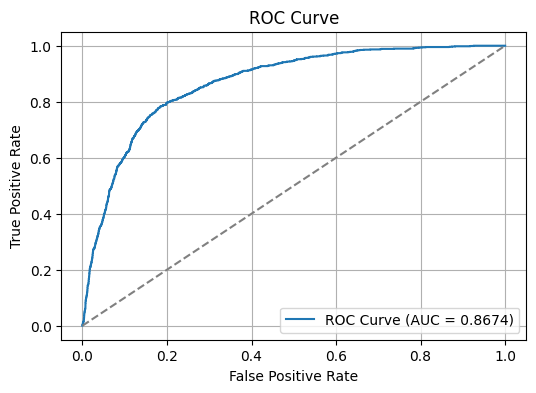

In [33]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [34]:
data['subscription_probability'] = model.predict_proba(X)[:, 1]
df_sorted = data.sort_values(by='subscription_probability', ascending=False)
print("Subscription Probility\n",df_sorted)

Subscription Probility
        age  job  marital  education  default  balance  housing  loan  contact  \
29182   40    4        1          2        0      543        1     0        0   
24148   59    9        1          2        0     6573        1     0        1   
9947    59    4        1          1        0     1321        0     0        2   
44602   45    7        2          1        0      955        0     0        2   
21113   43    6        1          2        0      423        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
5459    35    1        1          1        0      430        1     0        2   
4299    30    4        2          2        0      358        1     0        2   
18713   35    1        1          1        0      280        1     1        0   
4330    45    4        1          3        0     9051        1     0        2   
11914   24    9        2          0        0      126        1     0        2   

   

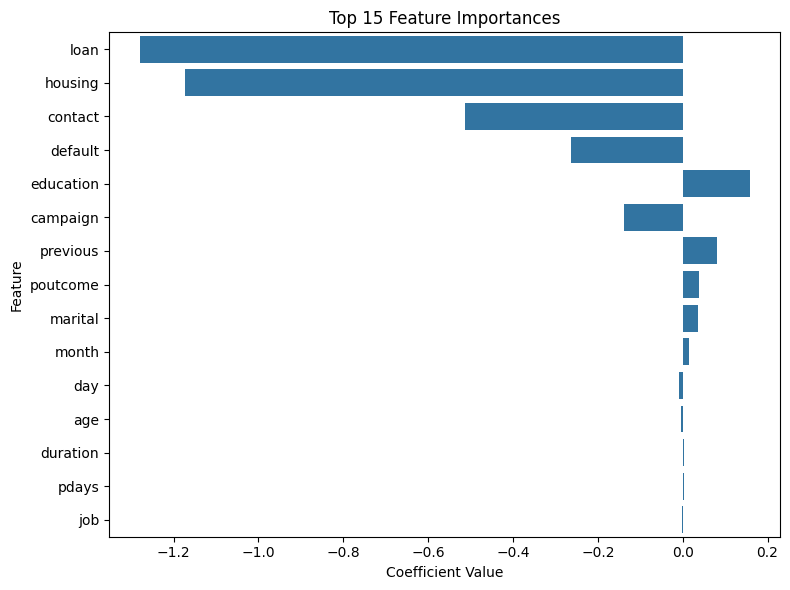

In [38]:
importances = model.coef_[0]

coef_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', key=abs, ascending=False).head(15)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=coef_df)
plt.title("Top 15 Feature Importances")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

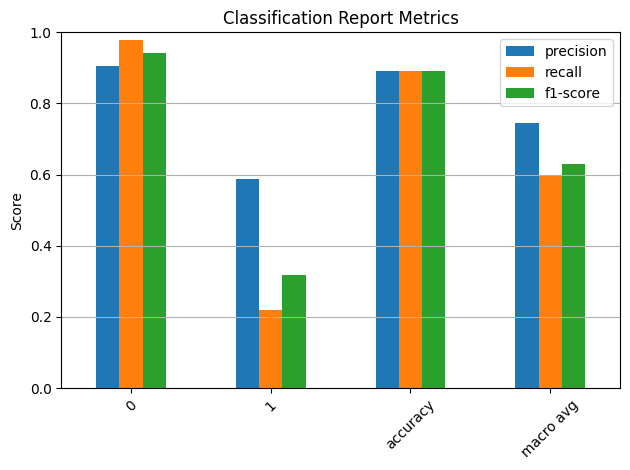

In [39]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
report_df.iloc[:-1, :-1].plot(kind='bar')
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()